In [47]:
#as always, let's start by loading some required python modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd

# Loading the dataset into the repository
Total_data=pd.read_csv("../project_data/Bio165_InfluenzaAIGG_Assay.csv")

In [48]:
# Saving columns for plotting: 
Time =  Total_data['day']

In [49]:
# Data was reported already as transformed:                                                                                                                                        

In [50]:
# Extracting each column in preparation for the log transformations
untrans_Ctrl = Total_data['Ctrl']  
untrans_Vax = Total_data['Vax']
untrans_IFNB = Total_data['IFNB']
untrans_Vax_IFNB = Total_data['Vax_IFNB']

In [51]:
# Group dataframe by the different columns––want to seperate IIV from LAIV conditions first
mean_Total_data = Total_data.groupby(["sti","day"], as_index=False).agg({"Ctrl": ['std','mean'],"Vax": ['std','mean'],"IFNB": ['std','mean'], "Vax_IFNB": ['std','mean']})
mean_Total_data.columns = mean_Total_data.columns.map('_'.join)
display(mean_Total_data)

,sti_,day_,Ctrl_std,Ctrl_mean,Vax_std,Vax_mean,IFNB_std,IFNB_mean,Vax_IFNB_std,Vax_IFNB_mean
0,IIV,3,1.267538,4.865931,2.652989,3.538942,2.566489,4.284288,2.760186,6.375904
1,IIV,7,1.167828,5.572559,2.346109,9.103023,3.822737,6.235578,1.078652,11.855246
2,IIV,10,1.131868,5.556852,1.522383,9.606592,4.376315,5.853949,1.506066,11.692530
3,LAIV,3,2.042530,4.201286,2.589663,6.626303,2.063915,5.656575,1.963120,7.967253
4,LAIV,7,3.249440,4.009043,1.712749,11.030848,2.782359,7.786935,1.134803,11.230518
5,LAIV,10,2.700973,4.033554,1.695154,11.149275,3.143026,7.475857,1.066370,11.192619


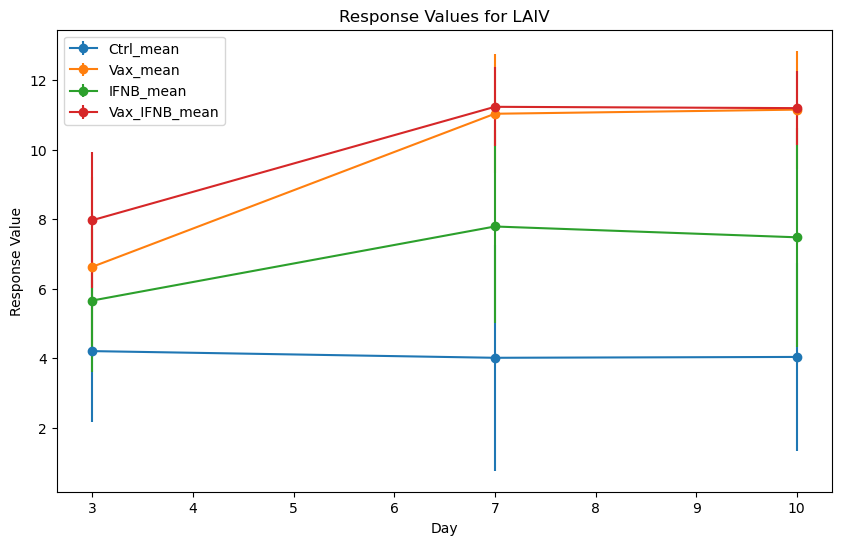

In [52]:
# Filter data for LAIV and IIV separately
laiv_data = mean_Total_data[mean_Total_data['sti_'] == 'LAIV']
iiv_data = mean_Total_data[mean_Total_data['sti_'] == 'IIV']

# Plot for LAIV
plt.figure(figsize=(10, 6))

plt.errorbar(laiv_data['day_'], laiv_data["Ctrl_mean"], yerr=laiv_data["Ctrl_std"], label="Ctrl_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["Vax_mean"],yerr=laiv_data["Vax_std"], label="Vax_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["IFNB_mean"], yerr=laiv_data["IFNB_std"],label="IFNB_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["Vax_IFNB_mean"], yerr=laiv_data["Vax_IFNB_std"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Response Values for LAIV')
plt.legend()
plt.show()

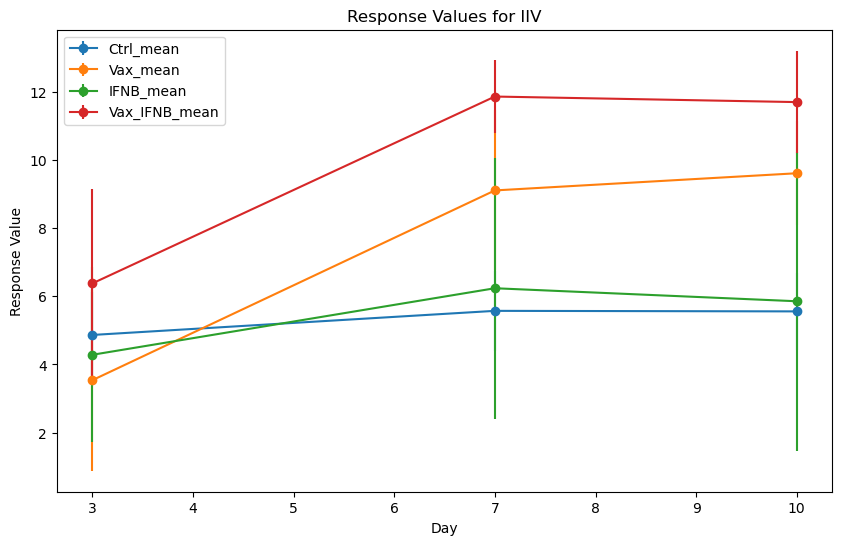

In [53]:
# Plot for IIV
plt.figure(figsize=(10, 6))

plt.errorbar(iiv_data['day_'], iiv_data["Ctrl_mean"], yerr=iiv_data["Ctrl_std"], label="Ctrl_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["Vax_mean"],yerr=iiv_data["Vax_std"], label="Vax_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["IFNB_mean"], yerr=iiv_data["IFNB_std"],label="IFNB_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["Vax_IFNB_mean"], yerr=iiv_data["Vax_IFNB_std"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Response Values for IIV')
plt.legend()
plt.show()